In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import dill
import sys
import numpy as np
import scipy
from collections import defaultdict

sys.path.append("../")
sys.path.append("../experiments/")

In [3]:
import matplotlib.pyplot as plt

In [4]:
from mt_codebase.load_relevances import experiment_load_relevances, relevances_to_lists, extract_verb_relevances
from mt_codebase.sampling_examples import create_candidate_dicts, read_instances_dict_and_append_label_fava
from mt_codebase.util import relevances_lists_to_t_values

In [5]:
results_dir = "../results/fava"

In [6]:
with open(os.path.join(results_dir, "resampling/candidate_instances.pkl"), "rb") as in_f:
    candidate_instances, candidate_results = dill.load(in_f)

In [7]:
instances_dict, candidates_dict = create_candidate_dicts(candidate_instances, candidate_results)

In [8]:
read_instances_dict_and_append_label_fava("../data/fava/dev.tsv", instances_dict)

In [9]:
fava_experiment_relevances = experiment_load_relevances(results_dir)["resampling"]

In [10]:
verb_idx_list = []
with open("../data/fava/verb_idx.txt") as inputfile:
    for line in inputfile:
        verb_idx_list.append(int(line))

In [11]:
verb_relevances = extract_verb_relevances(fava_experiment_relevances, verb_idx_list)

In [12]:
average_relevance_lists = relevances_to_lists(instances_dict, fava_experiment_relevances, lambda x: sum(x) / len(x), threshold=0.9)

In [13]:
verb_relevance_lists = relevances_to_lists(instances_dict, verb_relevances, lambda x: sum(x) / len(x), threshold=0.9)

In [14]:
incorrect_verb_relevance_t_values = relevances_lists_to_t_values([verb_relevance_lists[0], average_relevance_lists[0]])

In [15]:
correct_verb_relevance_t_values = relevances_lists_to_t_values([verb_relevance_lists[1], average_relevance_lists[1]])

In [16]:
incorrect_verb_relevance_t_values, correct_verb_relevance_t_values

((32.33173633344874, 1282.8424350747955),
 (19.065787057303652, 2181.5750054349232))

In [17]:
incorrect_verb_relevances = []
correct_verb_relevances = []
for idx in range(0, len(verb_idx_list), 2):
    if instances_dict[idx][1] > 0.9 and instances_dict[idx+1][1] > 0.9:
        if instances_dict[idx][2] == '0':
            incorrect_verb_relevances.append(verb_relevances[idx][0])
            correct_verb_relevances.append(verb_relevances[idx+1][0])
        else:
            incorrect_verb_relevances.append(verb_relevances[idx+1][0])
            correct_verb_relevances.append(verb_relevances[idx][0])

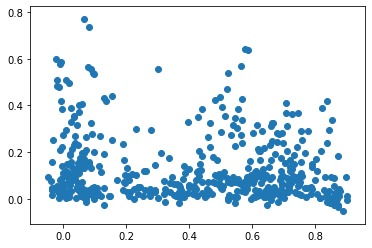

In [18]:
plt.scatter(incorrect_verb_relevances, correct_verb_relevances)

In [19]:
scipy.stats.pearsonr(incorrect_verb_relevances, correct_verb_relevances)

(-0.13427158573424935, 0.0026252039732286977)